In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.datasets import cifar100
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D , MaxPooling2D
from keras.optimizers import sgd_experimental , adam_v2 , rmsprop_v2  
import os
import tensorflow
from tensorflow import keras
from keras.regularizers import l2

In [3]:
# Burada elimizdeki dataseti içinde rastgele görüntü ve etiketi gösteriyor ve bu kod sayesinde elimizdeki bütün dataları genel şablon olarak görememizi sağlar 

def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.utils import shuffle
    (X_rand, Y_rand) = shuffle(X, Y)
    
    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)
        
    return

In [4]:
labels = ['Bed', 'Can' , 'Fox'  , 'Lamp'  , 'Motorcycle', 'Road' , 'Rose']

In [5]:
print(labels)

['Bed', 'Can', 'Fox', 'Lamp', 'Motorcycle', 'Road', 'Rose']


In [6]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
#classes = {5=bed(yatak) 16=can(teneke kutu) 34=fox(tilki) 40=lamp(lamba) 48=motorcycle(motosiklet) 68=road(yol) 70=rose(gül)}

169017344/169001437 [==============================] - 2s 0us/step


In [7]:
print(X_train.shape)

(50000, 32, 32, 3)


In [8]:
print(y_train.shape)

(50000, 1)


In [9]:
print(X_test.shape)

(10000, 32, 32, 3)


In [10]:
print(y_test.shape)

(10000, 1)


**şimdi cifar100 datasetinden #classes = {5=bed(yatak) 16=can(teneke kutu) 34=fox(tilki) 40=lamp(lamba) 48=motorcycle(motosiklet) 68=road(yol) 70=rose(gül)} 
sadece bu classları alarak kendimize bir dataseti oluşturucağız** 

*cifar100 datasetinden kendimizin istediği sınıfların , bu sınıflardaki verilerin index numaralarını alıyoruz*

In [11]:
index5 = np.where(y_train == 5)
index16 = np.where(y_train == 16)
index34 = np.where(y_train == 34)
index40 = np.where(y_train == 40)
index48 = np.where(y_train == 48)
index68 = np.where(y_train == 68)
index70 = np.where(y_train == 70)

In [12]:
#5. numaralı class daki verilerin bulunduğu X_train5  y_train5 
X_train5 = X_train[index5[0]]
y_train5 = y_train[index5[0]]
print(X_train5.shape)
print(y_train5.shape)

(500, 32, 32, 3)
(500, 1)


***yukarda gördüğümüz gibi her sınıfın train verisinde 500 adet veri bulunuyor***

In [13]:
#16 için
X_train16 = X_train[index16[0]]
y_train16 = y_train[index16[0]]

#34 için
X_train34 = X_train[index34[0]]
y_train34 = y_train[index34[0]]

#40 için
X_train40 = X_train[index40[0]]
y_train40 = y_train[index40[0]]

#48 için
X_train48 = X_train[index48[0]]
y_train48 = y_train[index48[0]]

#68 için
X_train68 = X_train[index68[0]]
y_train68 = y_train[index68[0]]

#70 için
X_train70 = X_train[index70[0]]
y_train70 = y_train[index70[0]]

***7 adet sınıfı tek bir sınıf da topluyoruz***

In [14]:
X_train_7Class = np.append(X_train5, X_train16, axis = 0)
y_train_7Class = np.append(y_train5, y_train16, axis = 0)

X_train_7Class = np.append(X_train_7Class, X_train34, axis = 0)
y_train_7Class = np.append(y_train_7Class, y_train34, axis = 0)

X_train_7Class = np.append(X_train_7Class, X_train40, axis = 0)
y_train_7Class = np.append(y_train_7Class, y_train40, axis = 0)

X_train_7Class = np.append(X_train_7Class, X_train48, axis = 0)
y_train_7Class = np.append(y_train_7Class, y_train48, axis = 0)

X_train_7Class = np.append(X_train_7Class, X_train68, axis = 0)
y_train_7Class = np.append(y_train_7Class, y_train68, axis = 0)

X_train_7Class = np.append(X_train_7Class, X_train70, axis = 0)
y_train_7Class = np.append(y_train_7Class, y_train70, axis = 0)

# Şimdi bunları test datası için yapıyoruz

In [15]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


In [16]:
index5_test  = np.where(y_test == 5)
index16_test = np.where(y_test == 16)
index34_test = np.where(y_test == 34)
index40_test = np.where(y_test == 40)
index48_test = np.where(y_test == 48)
index68_test = np.where(y_test == 68)
index70_test = np.where(y_test == 70)

In [17]:
#5 için
X_test5 = X_test[index5_test[0]]
y_test5 = y_test[index5_test[0]]

#16 için
X_test16 = X_test[index16_test[0]]
y_test16 = y_test[index16_test[0]]

#34 için
X_test34 = X_test[index34_test[0]]
y_test34 = y_test[index34_test[0]]

#40 için
X_test40 = X_test[index40_test[0]]
y_test40 = y_test[index40_test[0]]

#48 için
X_test48 = X_test[index48_test[0]]
y_test48 = y_test[index48_test[0]]

#68 için
X_test68 = X_test[index68_test[0]]
y_test68 = y_test[index68_test[0]]

#70 için
X_test70 = X_test[index70_test[0]]
y_test70 = y_test[index70_test[0]]

In [18]:
X_test_7Class = np.append(X_test5, X_test16, axis = 0)
y_test_7Class = np.append(y_test5, y_test16, axis = 0)

X_test_7Class = np.append(X_test_7Class, X_test34, axis = 0)
y_test_7Class = np.append(y_test_7Class, y_test34, axis = 0)

X_test_7Class = np.append(X_test_7Class, X_test40, axis = 0)
y_test_7Class = np.append(y_test_7Class, y_test40, axis = 0)

X_test_7Class = np.append(X_test_7Class, X_test48, axis = 0)
y_test_7Class = np.append(y_test_7Class, y_test48, axis = 0)

X_test_7Class = np.append(X_test_7Class, X_test68, axis = 0)
y_test_7Class = np.append(y_test_7Class, y_test68, axis = 0)

X_test_7Class = np.append(X_test_7Class, X_test70, axis = 0)
y_test_7Class = np.append(y_test_7Class, y_test70, axis = 0)

***Şimdi y_test_7Class ve y_train_7Class değerleri olan 5 16 34 40 48 68 70 bunları sırayla karşılık gelicek şekilde 0 1 2 3 4 5 6 ile değiştiriyoruz***

In [19]:
print(y_test_7Class.shape)

(700, 1)


In [20]:
print(y_test_7Class)

[[ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [ 5]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16]
 [16

In [21]:
for x in range(0,len(y_test_7Class)):
  if x < 100:
    y_test_7Class[x][0]  = 0
  elif x < 200:
    y_test_7Class[x][0]  = 1
  elif x < 300:
    y_test_7Class[x][0]  = 2
  elif x < 400:
    y_test_7Class[x][0]  = 3
  elif x < 500:
    y_test_7Class[x][0]  = 4
  elif x < 600:
    y_test_7Class[x][0]  = 5
  elif x < 700:
    y_test_7Class[x][0]  = 6

In [22]:
print(y_test_7Class.shape)

(700, 1)


In [24]:
print(y_test_7Class)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


***y_train_7Class için değiştiriyoruz şimdi de***

In [25]:
print(y_train_7Class.shape)

(3500, 1)


In [26]:
print(y_train_7Class)

[[ 5]
 [ 5]
 [ 5]
 ...
 [70]
 [70]
 [70]]


In [27]:
for x in range(0,len(y_train_7Class)):
  if x < 500:
    y_train_7Class[x][0]  = 0
  elif x < 1000:
    y_train_7Class[x][0]  = 1
  elif x < 1500:
    y_train_7Class[x][0]  = 2
  elif x < 2000:
    y_train_7Class[x][0]  = 3
  elif x < 2500:
    y_train_7Class[x][0]  = 4
  elif x < 3000:
    y_train_7Class[x][0]  = 5
  elif x < 3500:
    y_train_7Class[x][0]  = 6

In [28]:
print(y_train_7Class.shape)

(3500, 1)


In [29]:
print(y_train_7Class)

[[0]
 [0]
 [0]
 ...
 [6]
 [6]
 [6]]


# Oluşturmuş olduğumuz datasetini görselleştiriyoruz

**Train dataseti için**

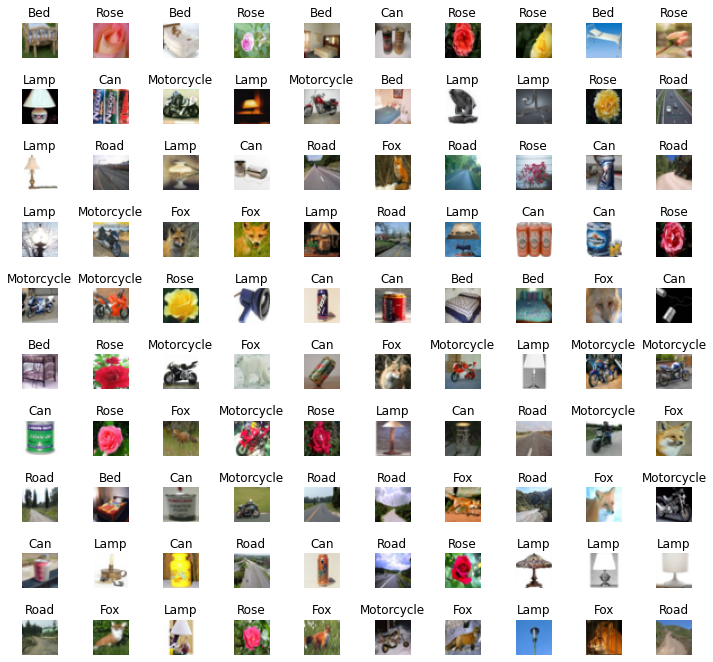

In [30]:
num_row = 10
num_col = 10
showImages(num_row,num_col,X =X_train_7Class,Y = y_train_7Class)

***Test dataseti için***

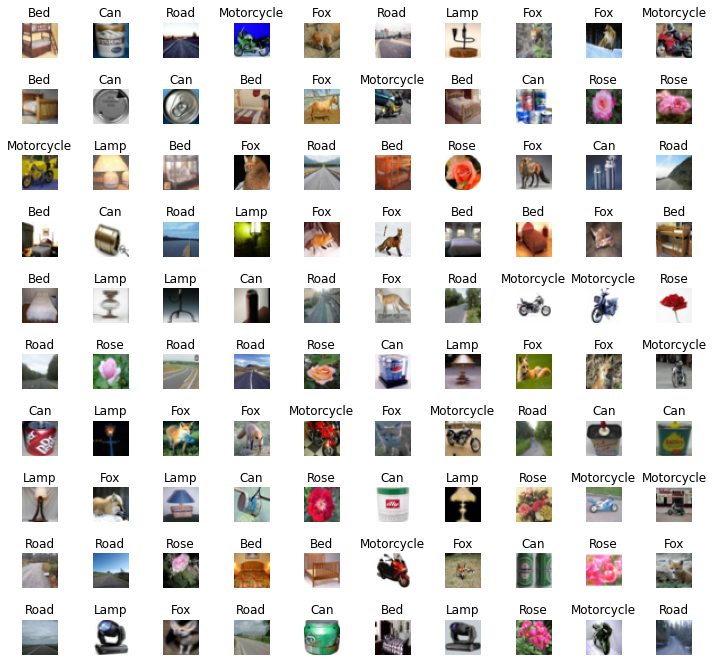

In [31]:
num_row = 10
num_col = 10
showImages(num_row,num_col,X =X_test_7Class,Y = y_test_7Class)

# Pre-Processing The Data:

***modeli eğitmeden önce bazı parametreleri tanımlıyoruz***

In [32]:
batch_size = 32
num_classes = 7
epochs = 50

**Convert class vectors to binary class matrices.**

In [33]:
import tensorflow as tf

In [34]:
y_train_7Class = tf.keras.utils.to_categorical(y_train_7Class, num_classes)
y_test_7Class = tf.keras.utils.to_categorical(y_test_7Class, num_classes)

## Kendi Modelimizi Oluşturuyoruz




In [35]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=X_train_7Class.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

***Oluşturduğumuz Sinir Ağını 3 boyutlu model ile gösteriyoruz***

In [36]:
!pip install git+https://github.com/paulgavrikov/visualkeras

  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-tf375seh
  Running command git clone -q https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-tf375seh
     |████████████████████████████████| 992 kB 5.1 MB/s 
  Created wheel for visualkeras: filename=visualkeras-0.0.2-py3-none-any.whl size=13449 sha256=dc3cc2490fa2bc1e9ff902b23731e4e8070c3e622c59dd5602e9e45081dd5f06
  Stored in directory: /tmp/pip-ephem-wheel-cache-p9w7ozh3/wheels/b8/3b/cf/30a062e766188d5fe50abf3d461720943b7d09906e3d261a94
Successfully built visualkeras


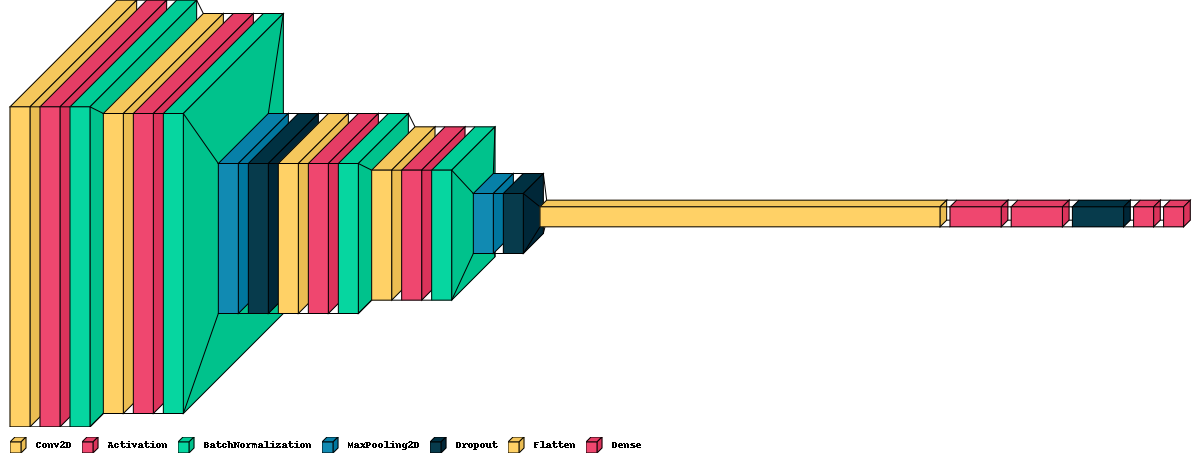

In [37]:
# Visualizing our model (Hidden Input)
import visualkeras
visualkeras.layered_view(model, scale_xy=10, legend=True)

# Modelimiz

In [38]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 64)       256       
 hNormalization)                                        

# Training datasetini derliyoruz şimdi :

In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

X_train_7Class = X_train_7Class.astype('float32')
X_test_7Class = X_test_7Class.astype('float32')

# Normalizing the input image
X_train_7Class /= 255
X_test_7Class /= 255

epochs=30

# Training the model
history = model.fit(X_train_7Class, y_train_7Class,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test_7Class, y_test_7Class),
              shuffle=True)

Epoch 1/30
110/110 [==============================] - 59s 524ms/step - loss: 10.9579 - accuracy: 0.4446 - val_loss: 11.0826 - val_accuracy: 0.2229
Epoch 2/30
110/110 [==============================] - 56s 506ms/step - loss: 9.8004 - accuracy: 0.5823 - val_loss: 11.7293 - val_accuracy: 0.1529
Epoch 3/30
110/110 [==============================] - 55s 499ms/step - loss: 9.2021 - accuracy: 0.6797 - val_loss: 10.2148 - val_accuracy: 0.3414
Epoch 4/30
110/110 [==============================] - 53s 486ms/step - loss: 8.7461 - accuracy: 0.7071 - val_loss: 9.0366 - val_accuracy: 0.5629
Epoch 5/30
110/110 [==============================] - 53s 485ms/step - loss: 8.3515 - accuracy: 0.7383 - val_loss: 8.2797 - val_accuracy: 0.7100
Epoch 6/30
110/110 [==============================] - 53s 483ms/step - loss: 7.9706 - accuracy: 0.7554 - val_loss: 7.9003 - val_accuracy: 0.7443
Epoch 7/30
110/110 [==============================] - 54s 487ms/step - loss: 7.5882 - accuracy: 0.7780 - val_loss: 7.5919 - va

## ***Modelin Değerlendirilmesi***

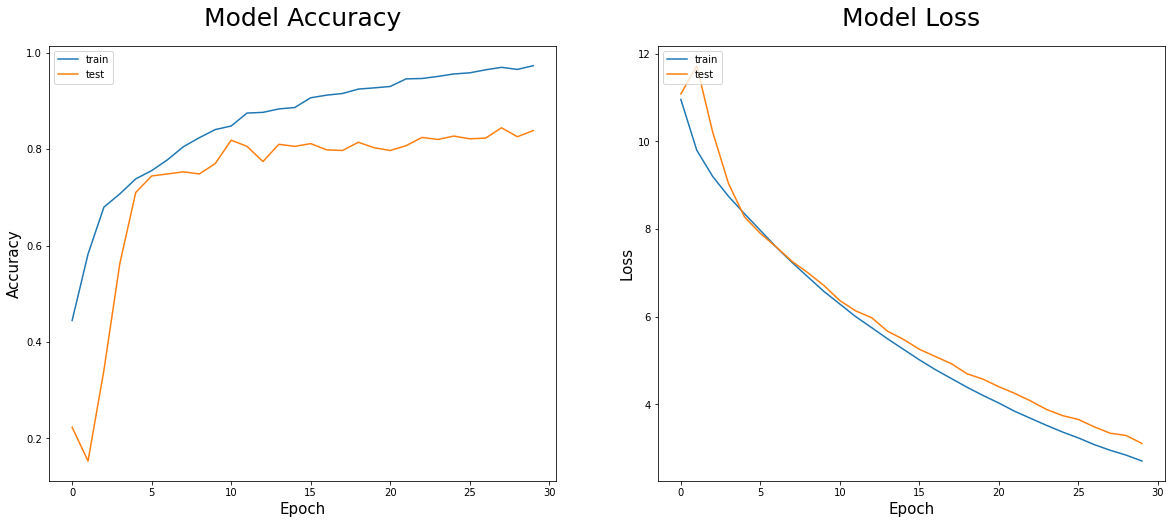

In [40]:
#  Model Accuracy & Model Loss vs Epochs Değerlerini Çizdiriyoruz
plt.figure(figsize=[20,8])

# accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

# loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

***Test datamızdaki bazı verilerin modelimize sokulduktan sonraki sonuç değerleri***

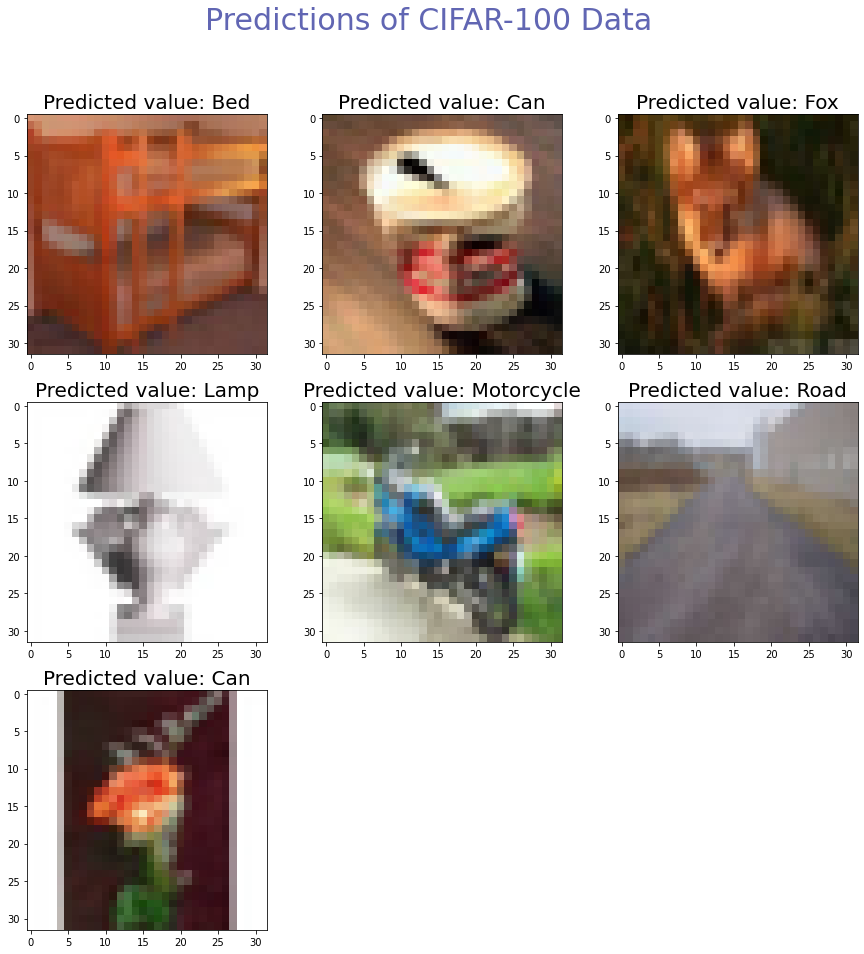

In [45]:
predictions = model.predict(X_test_7Class)

plt.figure(figsize=[15,15])

class_names = ['Bed', 'Can' , 'Fox'  , 'Lamp'  , 'Motorcycle', 'Road' , 'Rose']

plt.subplot(3,3,1)
n = 55
plt.imshow(X_test_7Class[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(3,3,2)
n = 112
plt.imshow(X_test_7Class[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(3,3,3)
n = 234
plt.imshow(X_test_7Class[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(3,3,4)
n = 397
plt.imshow(X_test_7Class[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(3,3,5)
n = 415
plt.imshow(X_test_7Class[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(3,3,6)
n = 555
plt.imshow(X_test_7Class[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(3,3,7)
n = 689
plt.imshow(X_test_7Class[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.suptitle("Predictions of CIFAR-100 Data", size=30, color="#6166B3")

plt.show()

***7 Sınıfdan rastgele test verisini modele tahmin ettirdim sadece rose yani gülü can(teneke kutu) olarak algıladı***

In [46]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar100_trained_model.h5'
# modelin ağırlıklarını kayıt ediyoruz

In [47]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/keras_cifar100_trained_model.h5 


In [48]:
# Score trained model.
scores = model.evaluate(X_test_7Class, y_test_7Class, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

22/22 [==============================] - 5s 227ms/step - loss: 3.1076 - accuracy: 0.8386
Test loss: 3.10758900642395
Test accuracy: 0.8385714292526245


**eğitimiz modelin test verisinde test ettiğmizde accuary ve loss değerleri**

# Confusion Matrix

In [49]:
import seaborn as sns

In [50]:
# Predict the values from the validation dataset
y_pred = model.predict(X_test_7Class)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test_7Class,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

[[Text(0, 0.5, 'Bed'),
  Text(0, 1.5, 'Can'),
  Text(0, 2.5, 'Fox'),
  Text(0, 3.5, 'Lamp'),
  Text(0, 4.5, 'Motorcycle'),
  Text(0, 5.5, 'Road'),
  Text(0, 6.5, 'Rose')],
 [Text(0.5, 0, 'Bed'),
  Text(1.5, 0, 'Can'),
  Text(2.5, 0, 'Fox'),
  Text(3.5, 0, 'Lamp'),
  Text(4.5, 0, 'Motorcycle'),
  Text(5.5, 0, 'Road'),
  Text(6.5, 0, 'Rose')]]

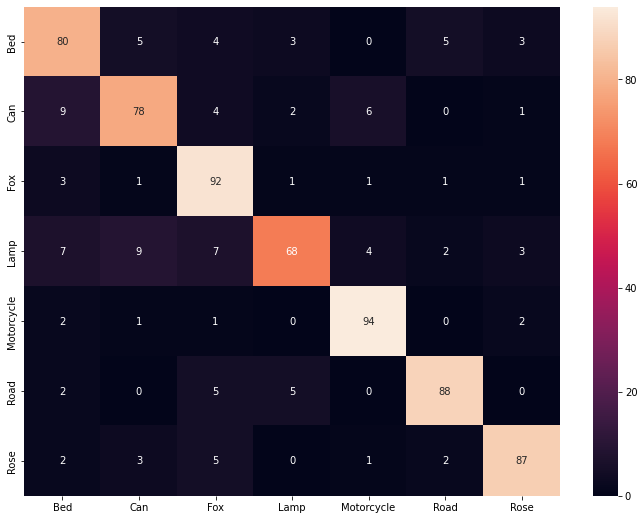

In [51]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=class_names, yticklabels=class_names)

***Confusion Matrix sayesinde hangi test verilerin hangi sınıflara tahmin edildiğini gösteriyor***